<a href="https://colab.research.google.com/github/3srava0/assignment-3/blob/main/03_Feature_Importance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Day 3: Feature Importance Analysis
# Real Estate Investment Advisor System
print("="*60)
print("FEATURE IMPORTANCE ANALYSIS - Real Estate Data")
print("="*60)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("\n✅ Libraries imported successfully!")

FEATURE IMPORTANCE ANALYSIS - Real Estate Data
Mounted at /content/drive

✅ Libraries imported successfully!


In [ ]:
# Load cleaned dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/assignment-3/data/india_housing_prices_featured.csv')
print(f"Dataset loaded: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset loaded: (247466, 38)

First few rows:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,City_Price_Ratio,School_Density_Score,Hospital_Density_Score,Amenity_Score,Floor_Category,Is_Ground_Floor,Is_High_Floor,ROI_Indicator,Affordability_Index,Parking_Space_Numeric
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,1.890346,7.972500,0.077168,4.9,High,0,1,0.752688,103.324895,0
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,0.755292,12.700592,0.124310,3.5,High,0,1,0.595784,27.569092,0
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,0.719145,8.141280,0.081732,6.3,High,0,1,0.382853,25.232015,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,1.169477,8.642232,0.086491,4.4,High,0,1,0.840251,54.777453,1
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,0.710161,8.049517,0.082013,4.3,Lower,0,0,0.306462,9.480614,0


In [ ]:
# Prepare data for modeling
print("\n" + "="*60)
print("DATA PREPARATION FOR FEATURE IMPORTANCE")
print("="*60)

# Select numerical features for analysis
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove ID and target variable (Price_in_Lakhs) from features
numerical_features = [col for col in numerical_features if col not in ['ID', 'Price_in_Lakhs']]

print(f"\nNumerical features selected: {len(numerical_features)}")
print(f"Features: {numerical_features}")

# Prepare X and y
X = df[numerical_features]
y = df['Price_in_Lakhs']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")



DATA PREPARATION FOR FEATURE IMPORTANCE

Numerical features selected: 22
Features: ['BHK', 'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Property_Age', 'SqFt_per_BHK', 'Is_Spacious', 'State_Price_Ratio', 'City_Price_Ratio', 'School_Density_Score', 'Hospital_Density_Score', 'Amenity_Score', 'Is_Ground_Floor', 'Is_High_Floor', 'ROI_Indicator', 'Affordability_Index', 'Parking_Space_Numeric']

X shape: (247466, 22)
y shape: (247466,)

Train set: (197972, 22)
Test set: (49494, 22)


In [15]:
# Train Random Forest Model
print("\n" + "="*60)
print("RANDOM FOREST FEATURE IMPORTANCE")
print("="*60)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("\nTraining Random Forest...")
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)

print(f"\nRandom Forest Performance:")
print(f"R² Score: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"RMSE: {rf_rmse:.4f}")

# Feature Importance
rf_importance = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features (Random Forest):")
print(rf_importance.head(10))



RANDOM FOREST FEATURE IMPORTANCE

Training Random Forest...

Random Forest Performance:
R² Score: 0.9999
MAE: 1.0211
RMSE: 1.3936

Top 10 Important Features (Random Forest):
                   Feature  Importance
12       State_Price_Ratio    0.999890
13        City_Price_Ratio    0.000023
14    School_Density_Score    0.000015
15  Hospital_Density_Score    0.000013
20     Affordability_Index    0.000007
10            SqFt_per_BHK    0.000006
5             Total_Floors    0.000006
16           Amenity_Score    0.000006
4                 Floor_No    0.000006
19           ROI_Indicator    0.000005


In [16]:
# Train Gradient Boosting Model
print("\n" + "="*60)
print("GRADIENT BOOSTING FEATURE IMPORTANCE")
print("="*60)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
print("\nTraining Gradient Boosting...")
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
gb_r2 = r2_score(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)

print(f"\nGradient Boosting Performance:")
print(f"R² Score: {gb_r2:.4f}")
print(f"MAE: {gb_mae:.4f}")
print(f"RMSE: {gb_rmse:.4f}")

# Feature Importance
gb_importance = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features (Gradient Boosting):")
print(gb_importance.head(10))



GRADIENT BOOSTING FEATURE IMPORTANCE

Training Gradient Boosting...

Gradient Boosting Performance:
R² Score: 0.9998
MAE: 1.3865
RMSE: 1.7760

Top 10 Important Features (Gradient Boosting):
                   Feature    Importance
12       State_Price_Ratio  9.999869e-01
14    School_Density_Score  1.082103e-05
15  Hospital_Density_Score  1.031145e-06
19           ROI_Indicator  8.595313e-07
13        City_Price_Ratio  3.291827e-07
2           Price_per_SqFt  9.716056e-09
20     Affordability_Index  2.514828e-09
5             Total_Floors  0.000000e+00
3               Year_Built  0.000000e+00
1             Size_in_SqFt  0.000000e+00


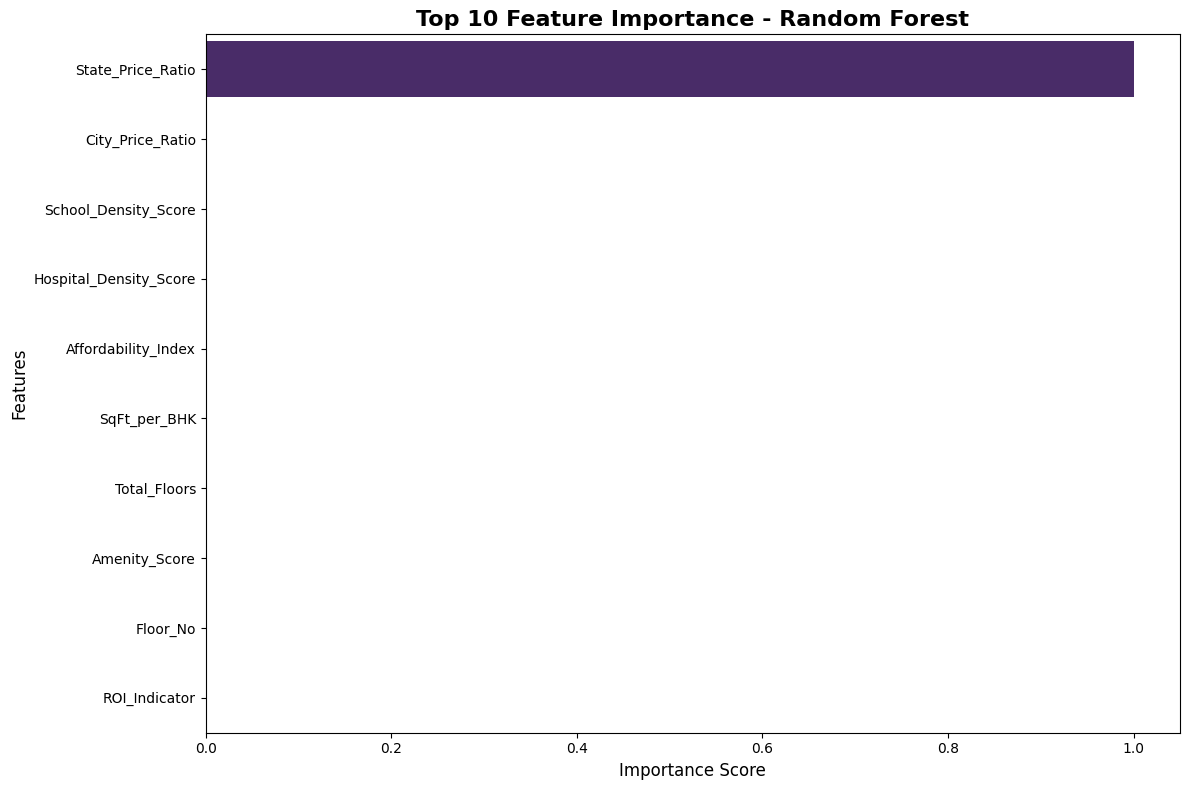

In [17]:
# Visualize Random Forest Feature Importance
plt.figure(figsize=(12, 8))
top_features_rf = rf_importance.head(10)
sns.barplot(x='Importance', y='Feature', data=top_features_rf, palette='viridis')
plt.title('Top 10 Feature Importance - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


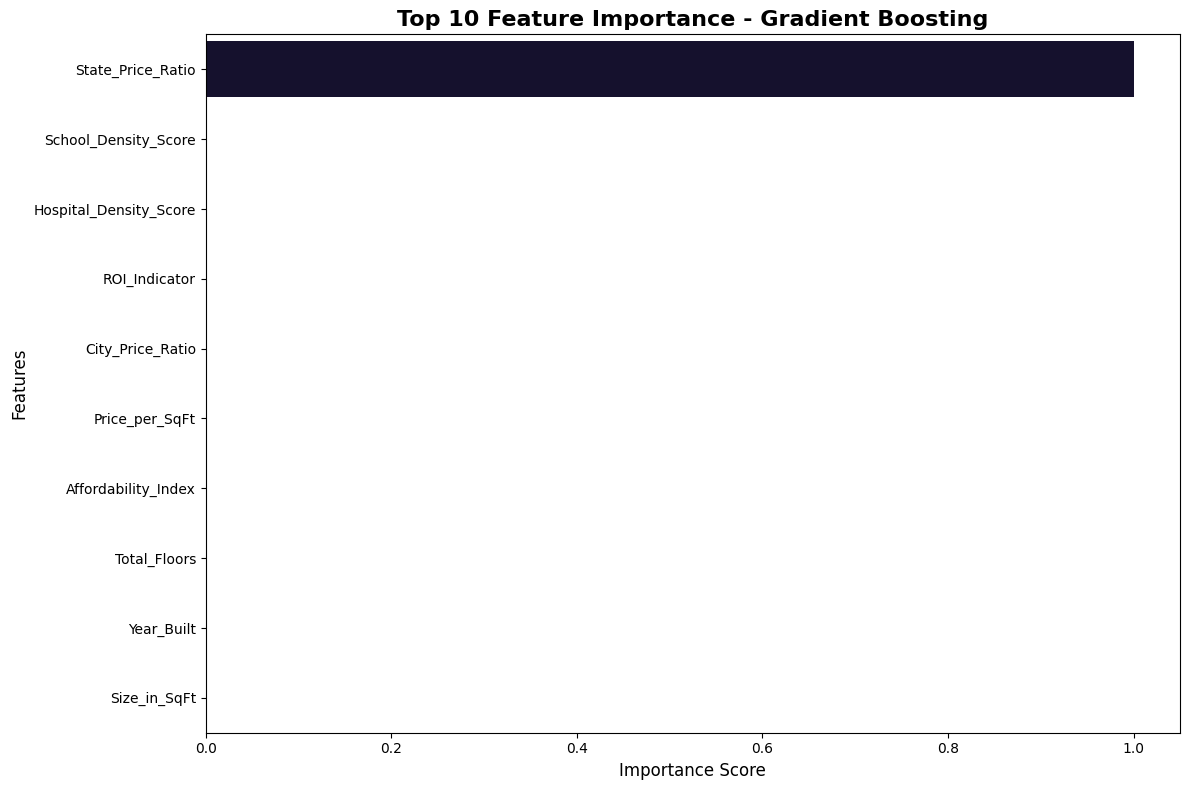

In [18]:
# Visualize Gradient Boosting Feature Importance
plt.figure(figsize=(12, 8))
top_features_gb = gb_importance.head(10)
sns.barplot(x='Importance', y='Feature', data=top_features_gb, palette='magma')
plt.title('Top 10 Feature Importance - Gradient Boosting', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


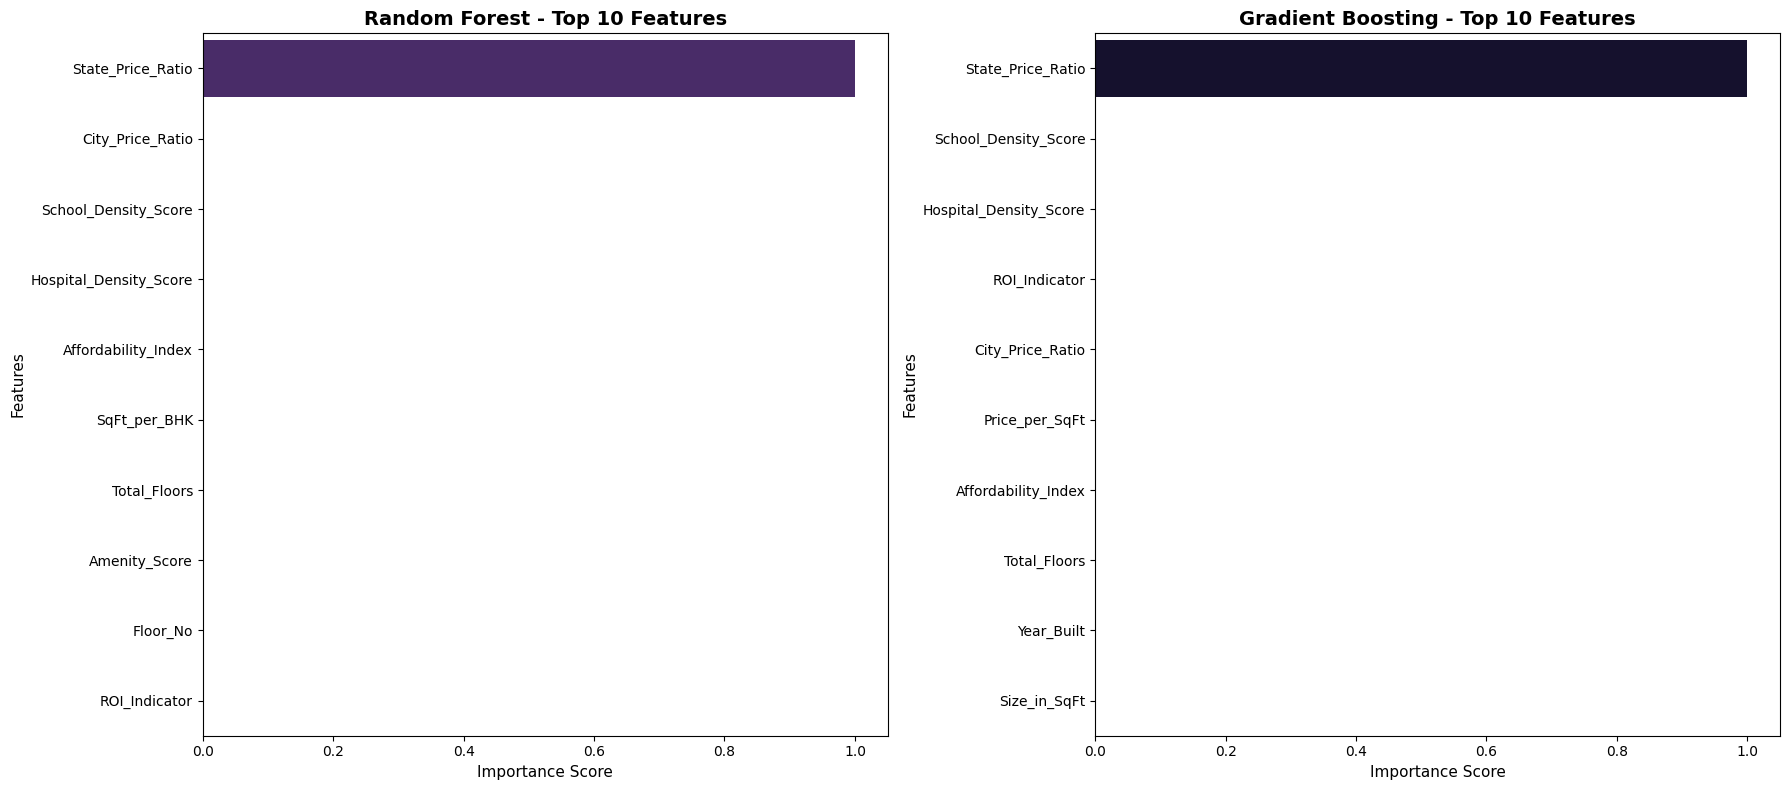

In [19]:
# Compare Feature Importance - Both Models
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Random Forest
sns.barplot(x='Importance', y='Feature', data=rf_importance.head(10),
            palette='viridis', ax=axes[0])
axes[0].set_title('Random Forest - Top 10 Features', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Importance Score', fontsize=11)
axes[0].set_ylabel('Features', fontsize=11)

# Gradient Boosting
sns.barplot(x='Importance', y='Feature', data=gb_importance.head(10),
            palette='magma', ax=axes[1])
axes[1].set_title('Gradient Boosting - Top 10 Features', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Importance Score', fontsize=11)
axes[1].set_ylabel('Features', fontsize=11)

plt.tight_layout()
plt.show()



MODEL PERFORMANCE COMPARISON
            Model  R² Score      MAE     RMSE
    Random Forest  0.999901 1.021132 1.393615
Gradient Boosting  0.999839 1.386491 1.776039


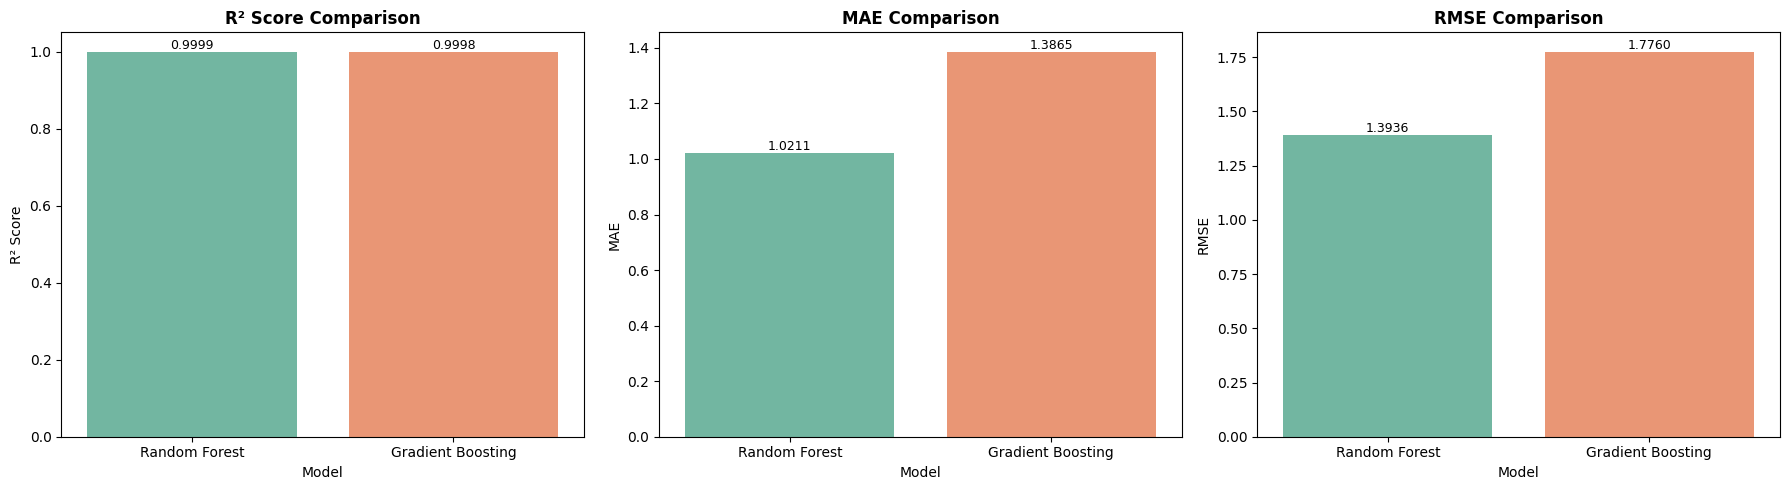

In [20]:
# Model Performance Comparison
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'R² Score': [rf_r2, gb_r2],
    'MAE': [rf_mae, gb_mae],
    'RMSE': [rf_rmse, gb_rmse]
})

print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)
print(comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['R² Score', 'MAE', 'RMSE']
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    sns.barplot(x='Model', y=metric, data=comparison_df, palette='Set2', ax=ax)
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric, fontsize=10)

    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', fontsize=9)

plt.tight_layout()
plt.show()



COMBINED FEATURE IMPORTANCE (BOTH MODELS)
                   Feature  RF_Importance  GB_Importance  Average_Importance
12       State_Price_Ratio       0.999890   9.999869e-01            0.999939
14    School_Density_Score       0.000015   1.082103e-05            0.000013
13        City_Price_Ratio       0.000023   3.291827e-07            0.000012
15  Hospital_Density_Score       0.000013   1.031145e-06            0.000007
20     Affordability_Index       0.000007   2.514828e-09            0.000003
10            SqFt_per_BHK       0.000006   0.000000e+00            0.000003
5             Total_Floors       0.000006   0.000000e+00            0.000003
16           Amenity_Score       0.000006   0.000000e+00            0.000003
4                 Floor_No       0.000006   0.000000e+00            0.000003
19           ROI_Indicator       0.000005   8.595313e-07            0.000003
1             Size_in_SqFt       0.000004   0.000000e+00            0.000002
8         Nearby_Hospitals       

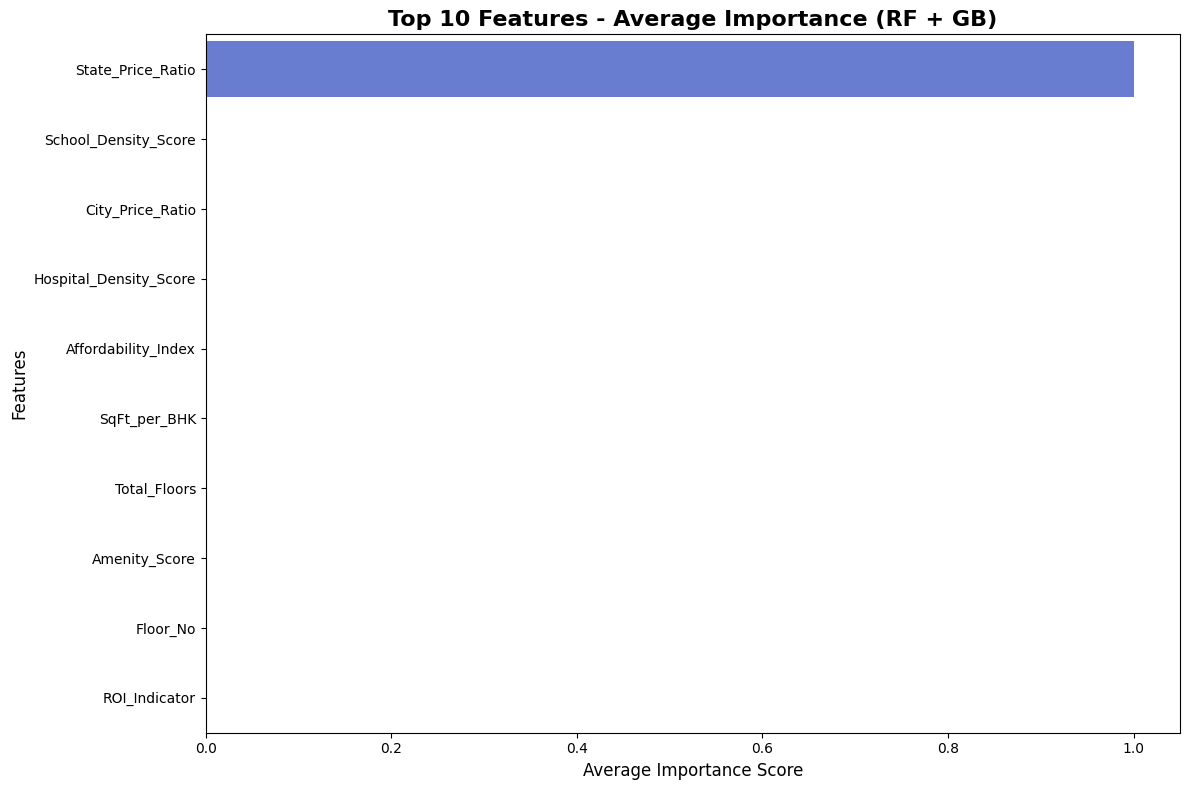

In [21]:
# Combine feature importance from both models
combined_importance = rf_importance.copy()
combined_importance = combined_importance.rename(columns={'Importance': 'RF_Importance'})
combined_importance['GB_Importance'] = combined_importance['Feature'].map(
    gb_importance.set_index('Feature')['Importance']
)
combined_importance['Average_Importance'] = (
    combined_importance['RF_Importance'] + combined_importance['GB_Importance']
) / 2
combined_importance = combined_importance.sort_values('Average_Importance', ascending=False)

print("\n" + "="*60)
print("COMBINED FEATURE IMPORTANCE (BOTH MODELS)")
print("="*60)
print(combined_importance.head(15))

# Visualize combined importance
plt.figure(figsize=(12, 8))
top_combined = combined_importance.head(10)
sns.barplot(x='Average_Importance', y='Feature', data=top_combined, palette='coolwarm')
plt.title('Top 10 Features - Average Importance (RF + GB)', fontsize=16, fontweight='bold')
plt.xlabel('Average Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


In [22]:
# Generate insights
print("\n" + "="*60)
print("KEY INSIGHTS FROM FEATURE IMPORTANCE ANALYSIS")
print("="*60)

top_5_features = combined_importance.head(5)['Feature'].tolist()
print("\n🎯 Top 5 Most Important Features:")
for i, feature in enumerate(top_5_features, 1):
    rf_imp = combined_importance[combined_importance['Feature'] == feature]['RF_Importance'].values[0]
    gb_imp = combined_importance[combined_importance['Feature'] == feature]['GB_Importance'].values[0]
    avg_imp = combined_importance[combined_importance['Feature'] == feature]['Average_Importance'].values[0]
    print(f"{i}. {feature}")
    print(f"   - Random Forest: {rf_imp:.4f}")
    print(f"   - Gradient Boosting: {gb_imp:.4f}")
    print(f"   - Average: {avg_imp:.4f}\n")

print("\n📊 Model Comparison:")
print(f"- Best R² Score: {'Random Forest' if rf_r2 > gb_r2 else 'Gradient Boosting'} ({max(rf_r2, gb_r2):.4f})")
print(f"- Best MAE: {'Random Forest' if rf_mae < gb_mae else 'Gradient Boosting'} ({min(rf_mae, gb_mae):.4f})")
print(f"- Best RMSE: {'Random Forest' if rf_rmse < gb_rmse else 'Gradient Boosting'} ({min(rf_rmse, gb_rmse):.4f})")

print("\n✅ Analysis Complete!")
print("="*60)



KEY INSIGHTS FROM FEATURE IMPORTANCE ANALYSIS

🎯 Top 5 Most Important Features:
1. State_Price_Ratio
   - Random Forest: 0.9999
   - Gradient Boosting: 1.0000
   - Average: 0.9999

2. School_Density_Score
   - Random Forest: 0.0000
   - Gradient Boosting: 0.0000
   - Average: 0.0000

3. City_Price_Ratio
   - Random Forest: 0.0000
   - Gradient Boosting: 0.0000
   - Average: 0.0000

4. Hospital_Density_Score
   - Random Forest: 0.0000
   - Gradient Boosting: 0.0000
   - Average: 0.0000

5. Affordability_Index
   - Random Forest: 0.0000
   - Gradient Boosting: 0.0000
   - Average: 0.0000


📊 Model Comparison:
- Best R² Score: Random Forest (0.9999)
- Best MAE: Random Forest (1.0211)
- Best RMSE: Random Forest (1.3936)

✅ Analysis Complete!
